In [1]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.segmentation import fuzzy_spatial, relabel_sequential

# Read the image
img = cv2.imread('image12.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to the grayscale image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply the Hough transform to detect lines in the image
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Calculate the vanishing point from the detected lines
vp_x, vp_y = 0, 0
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    vp_x += x0
    vp_y += y0

vp_x = int(vp_x / len(lines))
vp_y = int(vp_y / len(lines))

# Perform spatial fuzzy clustering on the grayscale image
fcmeans = fuzzy_spatial(gray, 3, 2, 5)
labelled = np.argmax(fcmeans, axis=-1)
labelled = relabel_sequential(labelled)[0]

# Apply Otsu thresholding to the grayscale image
otsu_threshold, otsu_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Create a mask for the road based on the fuzzy clustering and vanishing point
road_mask = ((labelled == 0) & (gray > otsu_threshold) & (gray > 150) & (gray < 200)
            & (np.abs(gray - np.mean(gray)) < 30) & (np.abs(gray - np.median(gray)) < 30))

# Create a mask for the non-road areas based on the fuzzy clustering and vanishing point
non_road_mask = ((labelled != 0) | (gray < otsu_threshold))

# Create a mask for the vanishing line
vanishing_line_mask = np.zeros(gray.shape, np.uint8)
cv2.line(vanishing_line_mask, (vp_x-50, vp_y), (vp_x+50, vp_y), 255, 2)

# Apply the vanishing line mask to the road and non-road masks
road_mask = cv2.bitwise_and(road_mask, vanishing_line_mask)
non_road_mask = cv2.bitwise_and(non_road_mask, vanishing_line_mask)

# Create color masks for the road and non-road areas
road_color = cv2.merge((np.zeros(gray.shape, np.uint8), road_mask.astype(np.uint8) * 255, np.zeros(gray.shape, np.uint8)))
non_road_color = cv2.merge((non_road_mask.astype(np.uint8) * 255, np.zeros(gray.shape, np.uint8), np.zeros(gray.shape, np.uint8)))

# Create a color image with the road and non-road areas labeled
labeled_img = cv2.addWeighted(road_color, 0.5, non_road_color, 0.5, 0)

# Display the labeled image
cv2.imshow('Labeled Image', labeled_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


ImportError: cannot import name 'fuzzy_spatial' from 'skimage.segmentation' (C:\Users\ksais\miniconda3\lib\site-packages\skimage\segmentation\__init__.py)

In [4]:
import cv2
#infrared_image = cv.imread('Image12.jpg')
def segment_image(infrared_image):
    # Perform image segmentation using the double-Otsu algorithm
    # Return the segmented image

    # Apply double-Otsu thresholding to segment the image
    _, segmented_image = cv2.threshold(infrared_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return segmented_image

# Main function
def main():
    # Load the infrared image 
    infrared_image = cv2.imread('Image12.jpg', cv2.IMREAD_GRAYSCALE)

    # Step 2: Image segmentation
    segmented_image = segment_image(infrared_image)

    # Display the segmented image
    cv2.imshow("Segmented Image", segmented_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == '__main__':
    main()


In [ ]:
# Apply Otsu's method to determine threshold value
ret2,thresh = cv.threshold(res2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

Image data shape: (262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144)
(262144, 1)
(4, 262144

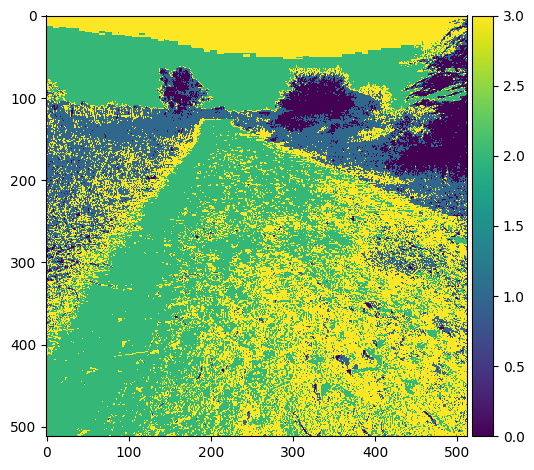

In [4]:
import numpy as np
import skimage.io as io
import skfuzzy as fuzz

# Load the image
image = io.imread('Image12.jpg')

# Preprocessing: Convert the image to grayscale
image_gray = io.imread('Image12.jpg', as_gray=True)

# Ensure single-dimensional entries are removed
image_gray = np.squeeze(image_gray)

# Print shape information for debugging
#print('Image shape:', image.shape)
#print('Grayscale image shape:', image_gray.shape)

# Reshape the grayscale image to a 1D array
image_data = np.reshape(image_gray, (-1, 1))

# Print shape information for debugging
print('Image data shape:', image_data.shape)

# Set the number of clusters (desired segments)
num_clusters = 4

# Set the fuzziness parameter
m = 2.0

# Apply Possibilistic C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(image_data.T, num_clusters, m, error=0.005, maxiter=1000)

# Calculate the cluster centers
cluster_centers = cntr.flatten()

# Calculate the membership degrees
membership_degrees = np.argmax(u, axis=0)

# Reshape the membership degrees back to the original image shape
segmented_image = membership_degrees.reshape(image_gray.shape)

# Display the segmented image
io.imshow(segmented_image)
io.show()


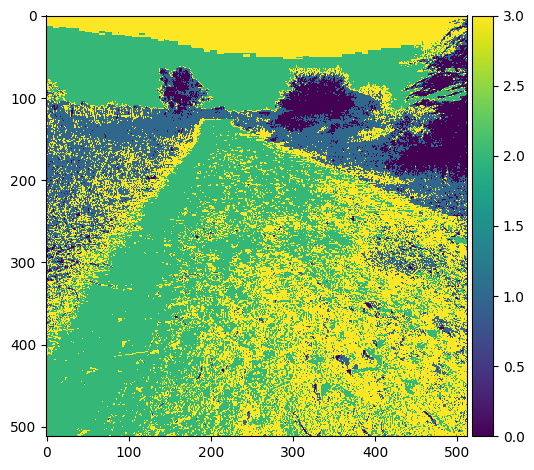

In [5]:
io.imshow(segmented_image)
io.show()

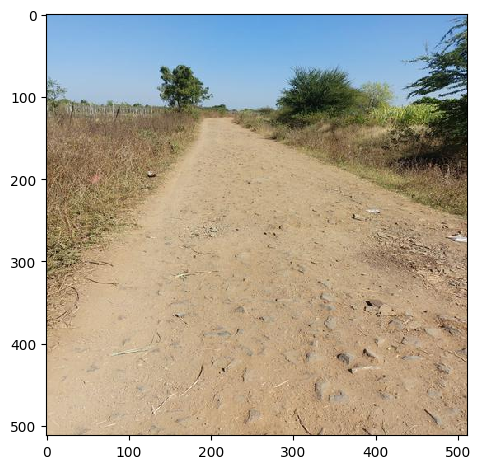

In [2]:
io.imshow(image)
io.show()